In [1]:
# import cv2
import h5py
import numpy as np
import pandas as pd
import datetime
import gc
from matplotlib import pyplot as plt
from collections import defaultdict

C:\Users\Landscape\Anaconda3\envs\PythonDLCPU\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
e1 = cv2.getTickCount()
img = cv2.imread('../data/12.JPG')
img2 = cv2.imread('../data/10.JPG')
img3 = cv2.imread('../data/25.JPG')
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

In [ ]:

e1 = cv2.getTickCount()
img_test = plt.imread('../data/12.JPG')
img_test2 = plt.imread('../data/10.JPG')
img_test3 = plt.imread('../data/25.JPG')
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

In [ ]:
img_test_list = [img_test, np.empty([2, 2, 3], dtype = 'uint8')]
img_test_list

In [ ]:
# np.dtype('uint8')
type(img_test)

In [ ]:
f = h5py.File("mytestfile4.hdf5", "a")
image_set_type = h5py.special_dtype(vlen=np.dtype('uint8'))
del f["mydataset"]
dset = f.create_dataset("mydataset", (len(img_test_list), ), dtype = image_set_type, compression="gzip", compression_opts = 9, chunks=True)
dset[...] = [img.flatten() for img in img_test_list]
f.close()

In [ ]:
f = h5py.File("mytestfile4.hdf5", "a")
f["mydataset"][1]

In [ ]:
img_test

In [ ]:
converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
converted

In [ ]:
img_mask = np.load('../data/12_mask.npy')

In [ ]:
for i, arr in enumerate(img_mask):
    for j, v in enumerate(arr):
        if v == 1:
            print(i, j, v)

In [ ]:
img_mask_partial = img_mask[2:13, 1500:1530]

In [58]:
def plotCVColorImage(image, size = (800, 800)):
    converted_size = (size[0] / 100, size[1] / 100)
    plt.figure(figsize=converted_size, dpi = 100)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
def plotRGBColorImage(image, size = (800, 800)):
    converted_size = (size[0] / 100, size[1] / 100)
    plt.figure(figsize=converted_size, dpi = 100)
    plt.axis("off")
    plt.imshow(image)
    plt.show()

In [ ]:
binary_image = img_mask_partial.astype('uint8')
points = cv2.findNonZero(binary_image)
x,y,w,h = cv2.boundingRect(points)
print(binary_image)
cv2.rectangle(binary_image, (x,y),(x+w - 1,y+h - 1), (5))
print(binary_image)
plt.imshow(binary_image)
plt.show()

In [ ]:
# plotCVImage(np_mask)
plt.imshow(img[])
plt.show()

In [ ]:
gray = img.copy()
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
white = gray.copy()
white.fill(255)
gray_inverted = white - gray # Invert the image s.t. Pass2Only will give the dark regions as desired



In [ ]:
cv2.imwrite('temp.jpg', gray_inverted)

In [ ]:
mser = cv2.MSER_create()
mser.setPass2Only(True)

regions, _ = mser.detectRegions(gray_inverted)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

In [ ]:

cv2.polylines(img, hulls, 1, (0, 255, 0))
cv2.waitKey(0)
plotCVImage(img, (800, 800))
cv2.imwrite('temp.jpg', img)
cv2.destroyAllWindows()

In [42]:
f = h5py.File("mytestfile4.h5", "a")
image_set_type = h5py.special_dtype(vlen = np.dtype('uint8'))
del f["mydataset"]
dset = f.create_dataset("mydataset", (1,), maxshape=(None,), dtype = image_set_type, compression="gzip", compression_opts = 9, chunks=True)
# dset[...] = [img.flatten() for img in img_test_list]
dset[0] = np.array([0, 0, 1])
dset.resize(dset.shape[0] + 1, axis=0)   
dset[1] = np.array([0, 1, 1])
print(dset)
f.close()

<HDF5 dataset "mydataset": shape (2,), type "|O">


Setup

In [51]:
data_file_name = "mytestfile6.h5"

In [52]:
f = h5py.File(data_file_name, "a")
variable_length_nparray_type = h5py.special_dtype(vlen = np.dtype('uint8'))
shape_name_tuple_type = np.dtype([('shape', [('axis1', np.uint8), ('axis2', np.uint8)]), ('image_name', 'S10')])

f.create_dataset("training_image_set", (0,), maxshape=(None,), dtype = variable_length_nparray_type, compression="gzip", compression_opts = 4, chunks=True)
f.create_dataset("training_mask_set", (0,), maxshape=(None,), dtype = variable_length_nparray_type, compression="gzip", compression_opts = 4, chunks=True)
f.create_dataset("training_label_set", (0,), maxshape=(None,), dtype = np.dtype('uint8'), compression="gzip", compression_opts = 4, chunks=True)
f.create_dataset("training_metadata_set", (0,), maxshape=(None,), dtype = shape_name_tuple_type, compression="gzip", compression_opts = 4, chunks=True)

f.create_dataset("testing_image_set", (0,), maxshape=(None,), dtype = variable_length_nparray_type, compression="gzip", compression_opts = 4, chunks=True)
f.create_dataset("testing_mask_set", (0,), maxshape=(None,), dtype = variable_length_nparray_type, compression="gzip", compression_opts = 4, chunks=True)
f.create_dataset("testing_label_set", (0,), maxshape=(None,), dtype = np.dtype('uint8'), compression="gzip", compression_opts = 4, chunks=True)
f.create_dataset("testing_metadata_set", (0,), maxshape=(None,), dtype = shape_name_tuple_type, compression="gzip", compression_opts = 4, chunks=True)

f.close()

Settings

In [53]:
f = h5py.File(data_file_name, "a")

In [ ]:
dataset_entry_index = 0
label_extension_steps = [0, 5, 10]
image_list = [str(i) for i in range(1, 12)]
image_suffix = '.JPG'
image_set = f["training_image_set"]
mask_set = f["training_mask_set"]
label_set = f["training_label_set"]
metadata_set = f["training_metadata_set"]

label_dictionary 
files_inverse_dictionary

In [14]:
for image_name in image_list:
    
    img_full = plt.imread('../data/'+ image_name + image_suffix)
    img_mask = np.load('../data/' + image_name + '_mask.npy')
    label_point_array = np.zeros(img_full.shape, dtype = np.dtype('uint8'))
    max_mask_val = np.max(img_mask)

    for x_coor, y_coor, label in label_dictionary[files_inverse_dictionary[image_name + image_suffix]]:
        label_point_array[y_coor][x_coor] = label
        
    crop_images = []
    crop_masks = []
    labels = []
    meta_data_list = []
    
    count = 0

    for mask_val in range(1, max_mask_val + 1):
        if mask_val > 2:
            break
        select_mask = img_mask == mask_val
        binary_mask = select_mask.astype('uint8')
        points = cv2.findNonZero(binary_mask)

        x, y, w, h = cv2.boundingRect(points)

        crop_image = img_full[y : y + h, x : x + w]
        crop_mask = binary_mask[y : y + h, x : x + w]
        meta_data = (crop_image.shape, image_name)

        this_label = 0
        for step in label_extension_steps:
            this_label = np.max(label_point_array[y - step : y + h + step, x - step : x + w + step])
            if this_label != 0:
                break
        
        if this_label != 0:
            crop_images.append( crop_image.flatten() )
            crop_masks.append( np.packbits(crop_mask.flatten()) )
            labels.append( this_label )
            meta_data_list.append( meta_data )
            count += 1
    
    image_set.resize(image_set.shape[0] + count, axis=0)
    mask_set.resize(mask_set.shape[0] + count, axis=0)
    label_set.resize(label_set.shape[0] + count, axis=0)
    metadata_set.resize(metadata_set.shape[0] + count, axis=0)
    
    image_set[-count:] = crop_images
    mask_set[-count:] = crop_masks
    label_set[-count:] = labels
    metadata_set[-count:] = meta_data_list
    
    print(image_name, count)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
f.close()

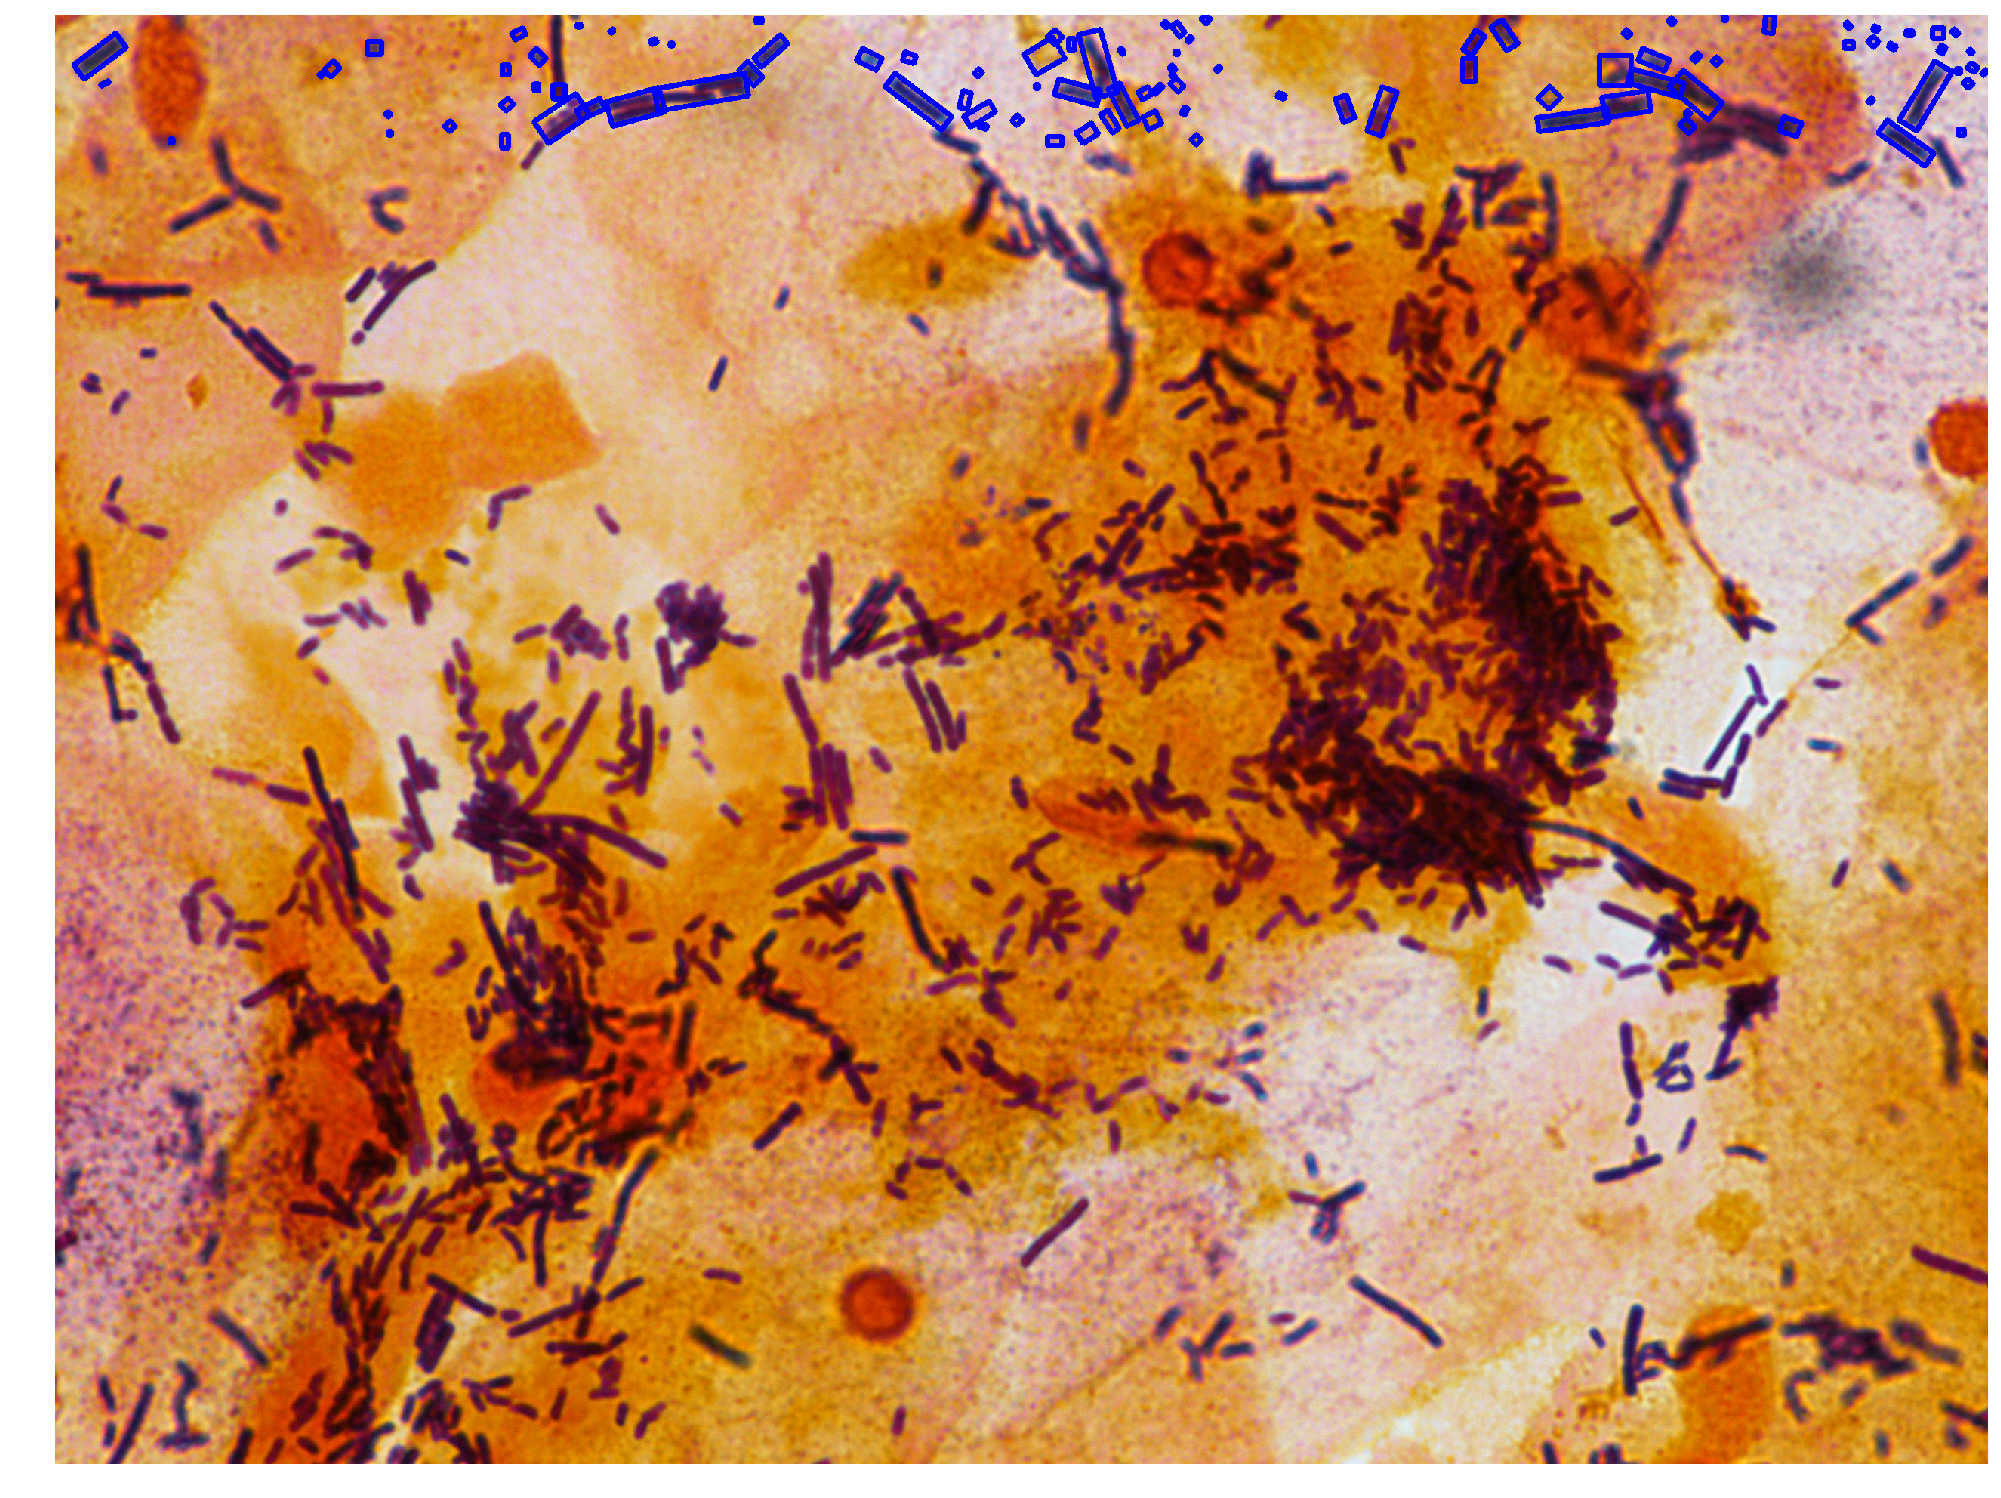

In [72]:
plotRGBColorImage(img_full, (2560, 1920))

In [19]:
test_mask = np.array(crop_mask)


In [24]:
sha = test_mask.shape
test_mask

(6, 5)

In [25]:
b = np.packbits(test_mask.flatten())
b

array([ 71, 191, 255, 184], dtype=uint8)

In [26]:
c = np.unpackbits(b)
c

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=uint8)

In [29]:
np.resize(c, sha)

array([[0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0]], dtype=uint8)

In [47]:
comp_type = np.dtype([('shape', [('axis1', np.uint8), ('axis2', np.uint8)]), ('image_name', np.str_, 10)])
comp_type

dtype([('shape', [('axis1', 'u1'), ('axis2', 'u1')]), ('image_name', '<U10')])

In [15]:
a = np.array([i for i in range(8)])
a.shape

(8,)

In [14]:
np.resize(a, (2, 2, 2))

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [67]:
np.max(np.load("/User_Files/Applications/CellProfiler/output/1_mask.npy"))

159

In [46]:
a = np.ones((5,1))


s = a.shape
print(a.shape)
c = 3

if s[0] > c or s[1] > c:
    startx = s[1] // 2 - (c // 2)
    starty = s[0] // 2 - (c // 2)    
    a = a[max(starty, 0): starty + c, max(startx, 0) : startx + c]
    s = a.shape
    
full_pad = ((c - s[0]), (c - s[1]))

b = np.lib.pad(a, (( full_pad[0] // 2, full_pad[0] - full_pad[0] // 2), ( full_pad[1] // 2, full_pad[1] - full_pad[1] // 2)), 'constant', constant_values = 127 )

print(b.shape)
b

(5, 1)
(3, 3)


array([[127.,   1., 127.],
       [127.,   1., 127.],
       [127.,   1., 127.]])

In [20]:
def crop_center(img,cropx,cropy):
    y, x = img.shape


[2, 3]

In [56]:
A = np.random.random((2))
print(A)
B = np.flip(A, axis = 0)
print(B)

[0.81260962 0.06447595]
[0.06447595 0.81260962]


In [52]:
S = '%s.{epoch:03d}.h5' % "ResNet26"

In [55]:
S.format(epoch = 0)

'ResNet26.000.h5'

In [25]:
def get_gen(x):
    y = x + 5
    def gen():
        for i in range(x, y):
            yield i
    return gen()

In [26]:
a = get_gen(5)
b = get_gen(6)

In [27]:
for i in range(5):
    print(next(a), next(b))

5 6
6 7
7 8
8 9
9 10


In [29]:
np.ceil(5)

5.0

In [32]:
gc.collect()

70

In [8]:
a = np.array([1,1,1,2,2,2,1,1,1,3])
b = np.array([1,1,2,1,2,2,2,1,2,1])

dframe = pd.crosstab(a, b)
print(dframe)
# dframe.to_csv()
dframe.as_matrix()

col_0  1  2
row_0      
1      3  3
2      1  2
3      1  0


array([[3, 3],
       [1, 2],
       [1, 0]], dtype=int64)

In [54]:
np.seterr(divide='ignore')
a = np.random.randint(5, size=(4, 4))
# b = np.random.random((4, 1))
a[0] = 0
a[:, 1] = 0
print(a)
# print(b)

[[0 0 0 0]
 [3 0 2 0]
 [2 0 4 1]
 [0 0 1 1]]


In [55]:
def cross_table_to_probability_table(cross_table_2D):
    prob_x_cross_table = cross_table_2D.astype(float)
    cross_x_table_sum = cross_table_2D.sum(axis=-1, keepdims=True)
    
    for x in range(cross_table_2D.shape[-1]):
        if cross_x_table_sum[x, 0] == 0:
            for y in range(cross_table_2D.shape[-2]):
                prob_x_cross_table[x, y] = 1 if x == y else 0
        else:
            for y in range(cross_table_2D.shape[-2]):   
                prob_x_cross_table[x, y] /= cross_x_table_sum[x, 0]

    prob_y_cross_table = cross_table_2D.astype(float)
    cross_y_table_sum = cross_table_2D.sum(axis=-2, keepdims=True)
    
    for y in range(cross_table_2D.shape[-2]):
        if cross_y_table_sum[0, y] == 0:
            for x in range(cross_table_2D.shape[-1]):
                prob_y_cross_table[x, y] = 1 if x == y else 0
        else:
            for x in range(cross_table_2D.shape[-1]):   
                prob_y_cross_table[x, y] /= cross_y_table_sum[0, y]

                
    return prob_x_cross_table, prob_y_cross_table

In [56]:
print(a)
cross_table_to_probability_table(a)

[[0 0 0 0]
 [3 0 2 0]
 [2 0 4 1]
 [0 0 1 1]]


(array([[1.        , 0.        , 0.        , 0.        ],
        [0.6       , 0.        , 0.4       , 0.        ],
        [0.28571429, 0.        , 0.57142857, 0.14285714],
        [0.        , 0.        , 0.5       , 0.5       ]]),
 array([[0.        , 0.        , 0.        , 0.        ],
        [0.6       , 1.        , 0.28571429, 0.        ],
        [0.4       , 0.        , 0.57142857, 0.5       ],
        [0.        , 0.        , 0.14285714, 0.5       ]]))

In [74]:
a = np.random.randint(5, size=(4, 4))
b = np.random.randint(5, size=(4, 4))
c = np.empty((0,4,4))
print(a, b, c)
c = np.concatenate((c, np.reshape(a, (1, 4, 4))), axis = 0)
c = np.concatenate((c, np.reshape(b, (1, 4, 4))), axis = 0)
print(c)

[[3 1 3 1]
 [1 4 4 0]
 [1 2 3 1]
 [2 3 3 0]] [[0 2 3 1]
 [0 4 1 1]
 [0 0 4 0]
 [1 1 4 0]] []
[[[3. 1. 3. 1.]
  [1. 4. 4. 0.]
  [1. 2. 3. 1.]
  [2. 3. 3. 0.]]

 [[0. 2. 3. 1.]
  [0. 4. 1. 1.]
  [0. 0. 4. 0.]
  [1. 1. 4. 0.]]]


In [68]:
a = np.random.randint(5, size=(4, 4))
print(a)
a = np.reshape(a, (1, 4, 4))
print(a)
print(a.shape)

[[0 1 2 3]
 [3 2 4 1]
 [0 4 0 0]
 [3 1 0 4]]
[[[0 1 2 3]
  [3 2 4 1]
  [0 4 0 0]
  [3 1 0 4]]]
(1, 4, 4)


In [69]:
np.array(['a', 'bbb', 'c'])

array(['a', 'bbb', 'c'], dtype='<U3')

In [73]:
save_time = datetime.datetime.now()
save_time.strftime("%Y%m%d%H%M")

'201802021512'

In [76]:
S = np.array(["AAA", "BBB"], dtype="S256")

In [77]:
print(S)

[b'AAA' b'BBB']


In [85]:
A = np.random.randint(10, size = (2, 3, 4))
print(A)
print(A.sum(axis = -2))

[[[7 3 4 6]
  [0 2 9 7]
  [3 7 6 1]]

 [[6 7 4 0]
  [8 3 1 9]
  [1 2 9 3]]]


In [93]:
A = defaultdict(list)
A['0'] = (1,2)
A['1'] = (2,3)
print(A)

defaultdict(<class 'list'>, {'0': (1, 2), '1': (2, 3)})


In [99]:
name_ints_tuple_type = np.dtype([
    ('image_name', 'S256'),
    ('scores', [('A', np.uint16), ('B', np.uint16)])
])
list(sorted(A.items()))


[('0', (1, 2)), ('1', (2, 3))]

In [100]:
np.array(list(sorted(A.items())), dtype = name_ints_tuple_type)

array([(b'0', (1, 2)), (b'1', (2, 3))],
      dtype=[('image_name', 'S256'), ('scores', [('A', '<u2'), ('B', '<u2')])])

In [102]:
"Score: {:d} + {:d} + {:d} = {:2d}, Interpretation: {:s}".format(1,2,3,4,"STR")

'Score: 1 + 2 + 3 =  4, Interpretation: STR'

In [105]:
df2 = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)), index=['A', 'B', 'C', 'D', 'E'], columns=['a', 'b', 'c', 'd', 'e'])
display(df2)

a  b  c  d  e
A  8  3  4  4  2
B  7  3  5  8  3
C  6  1  2  4  7
D  7  8  4  0  6
E  1  1  9  9  0

In [3]:
A = np.array([[0,0,1,1,1,5,2,1], [1,1,5,3,2,1,1,0]])

In [5]:
np.where(A < 5, A, np.full(A.shape, -1))

array([[ 0,  0,  1,  1,  1, -1,  2,  1],
       [ 1,  1, -1,  3,  2,  1,  1,  0]])